In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#Display propertice
pd.set_option('max_columns', 104)
pd.set_option('max_rows',104)

In [6]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Fifa20_Final_Project_Files/players_20.csv"
df=pd.read_csv(path)
#importing data
#df = pd.read_csv('players_20.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,...,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,temp
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,...,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,...,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,63+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,...,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,63+2
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,...,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63+2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,N

In [7]:
df.shape

(18278, 105)

In [8]:
df.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lcb           object
cb            object
rcb           object
rb            object
temp          object
Length: 105, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 105 entries, sofifa_id to temp
dtypes: float64(16), int64(45), object(44)
memory usage: 14.6+ MB


In [10]:
#number of unique elements in dataset
df.nunique()

sofifa_id     18278
player_url    18278
short_name    17354
long_name     18218
age              27
              ...  
lcb             110
cb              110
rcb             110
rb               96
temp              1
Length: 105, dtype: int64

In [11]:
missing_values = df.isnull().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values


team_position           0.013131
team_jersey_number      0.013131
contract_valid_until    0.013131
joined                  0.070467
release_clause_eur      0.071014
rf                      0.111391
rw                      0.111391
lam                     0.111391
cam                     0.111391
ram                     0.111391
lm                      0.111391
lcm                     0.111391
cm                      0.111391
rcm                     0.111391
lwb                     0.111391
cf                      0.111391
ldm                     0.111391
cdm                     0.111391
rdm                     0.111391
rwb                     0.111391
lb                      0.111391
lcb                     0.111391
cb                      0.111391
rm                      0.111391
lf                      0.111391
st                      0.111391
rs                      0.111391
pace                    0.111391
shooting                0.111391
passing                 0.111391
dribbling 

In [12]:
df.isnull().any()

sofifa_id     False
player_url    False
short_name    False
long_name     False
age           False
              ...  
lcb            True
cb             True
rcb            True
rb             True
temp          False
Length: 105, dtype: bool

In [13]:
#drop columns that have  more than 50% data as null
cols_to_delete = df.columns[df.isnull().sum()/len(df) > .50]
print(cols_to_delete)
df=df.drop(cols_to_delete, axis=1)

pd.set_option("display.max_columns", None) # display all columns
df.head(5)

Index(['player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits'],
      dtype='object')


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,temp
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,01-07-2004,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,10-07-2018,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,63+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,10.0,03-08-2017,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,63+2
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,13.0,16-07-2014,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63+2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,01-07-2019,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,63+2


In [14]:
#df = df.drop(columns = ['sofifa_id', 'player_url', 'long_name', 'dob','player_positions', 'real_face', 'release_clause_eu
#drop columns that would NOT be required for categorizing players on their traits and features

df = df.drop(columns = ['sofifa_id', 'player_url', 'long_name', 'dob', 'value_eur','real_face', 'release_clause_eur', 'team_position', 'team_jersey_number','joined'], axis=1)
pd.set_option("display.max_columns", None) # display all columns

df.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,temp
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,63+2
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,63+2
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,125000,GK,Right,3,3,1,Medium/Medium,Normal,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63+2
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,63+2


identifying and removing duplicate column Some of the columns like eg ls, st, rs were duplicated. In football, they basically stand for the same position 'forward'. Hence such columsn were eliminated.

In [15]:
def getDuplicateColumns(df):
    duplicateColumnNames=set()
    for x in range (df.shape[1]):
        col=df.iloc[:, x]
        for y in range (x+1, df.shape[1]):
            otherCol=df.iloc[:,y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
    return list (duplicateColumnNames)

duplicateColumnNames = getDuplicateColumns(df)
for col in duplicateColumnNames:
    print('Column name : ', col)
#16 columns are duplicates, remaining 8 columns 

Column name :  rm
Column name :  rwb
Column name :  ram
Column name :  rdm
Column name :  rw
Column name :  cb
Column name :  rs
Column name :  rb
Column name :  cm
Column name :  rf
Column name :  cdm
Column name :  rcb
Column name :  cf
Column name :  rcm
Column name :  cam
Column name :  st


In [16]:
df.describe().columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeepin

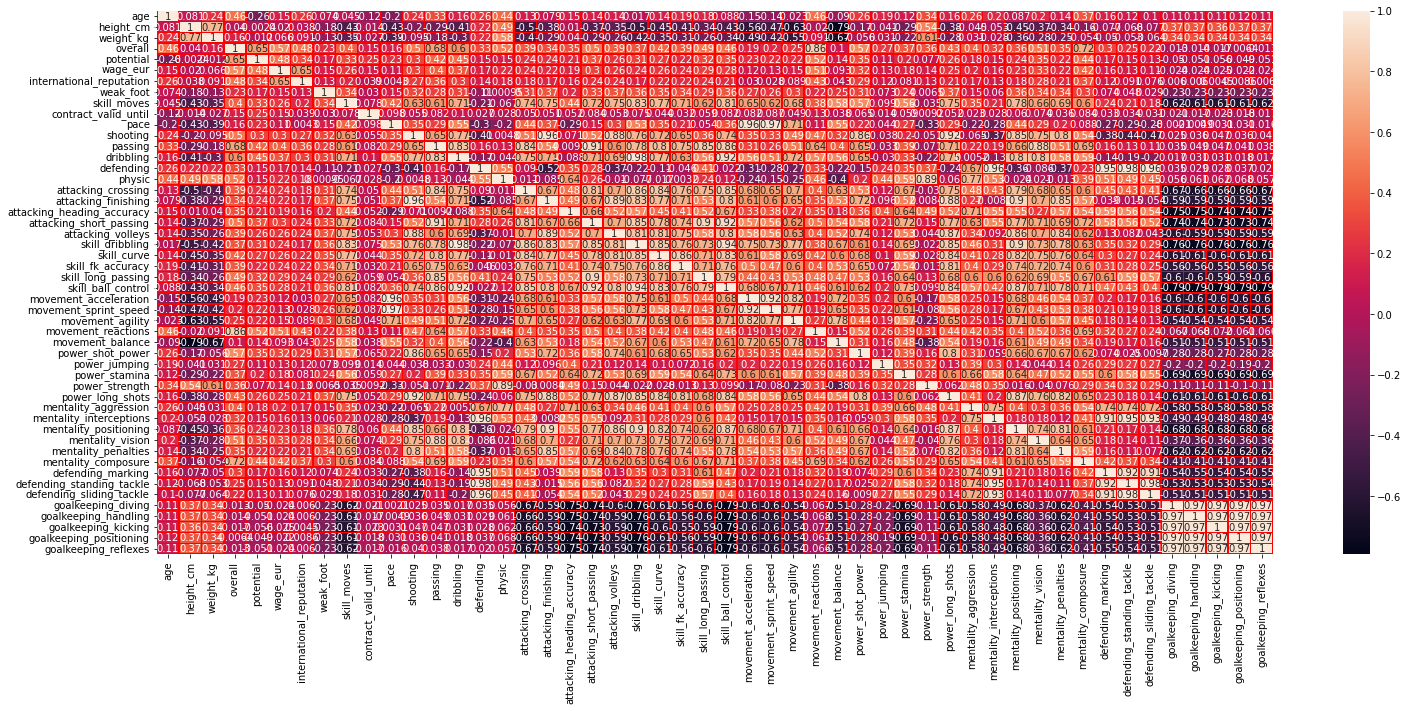

In [17]:
# Plotting the Heatmap of the columns using correlation matrix
#f,ax = plt.subplots(figsize=(25, 15))
#sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="red", fmt= '.1f',ax=ax)
#plt.show()
corr = df.corr()
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="red")

plt.show()



Number of players for each categorical variables

In [18]:
names = df.short_name.tolist() # saving names for later https://www.geeksforgeeks.org/python-pandas-series-tolist/

df = df.drop(['short_name'], axis = 1) # drop the short_name column

In [19]:
#numeric_data = df.select_dtypes(include=[np.number])
#categorical_data = df.select_dtypes(exclude=[np.number])

#numeric_data.shape



In [20]:
pd.set_option('display.max_rows',70)  #https://pandas.pydata.org/docs/user_guide/options.html
df.isnull().sum()

age               0
height_cm         0
weight_kg         0
nationality       0
club              0
               ... 
lcb            2036
cb             2036
rcb            2036
rb             2036
temp              0
Length: 83, dtype: int64

In [21]:
df = df.fillna(df.mean())

In [22]:
df = df[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

Hierarchical Clustering

In [23]:
df.head()

,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,weak_foot,skill_moves,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,565000,5,4,4,2021.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,405000,5,4,5,2022.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,290000,5,5,5,2022.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,125000,3,3,1,2023.0,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,470000,4,4,4,2024.0,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [24]:
df.shape

(18278, 50)

In [25]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.615385,0.285714,0.366667,1.000000,0.978261,1.000000,1.00,0.75,0.75,0.285714,0.875000,0.987179,1.000000,1.000000,0.320000,0.619048,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.000000,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923
1,0.692308,0.632653,0.550000,0.978261,0.956522,0.716814,1.00,0.75,1.00,0.428571,0.916667,1.000000,0.852941,0.904110,0.266667,0.809524,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.800000,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890
2,0.423077,0.387755,0.300000,0.956522,0.934783,0.513274,1.00,1.00,1.00,0.428571,0.930556,0.897436,0.926471,0.986301,0.226667,0.492063,0.931818,0.913978,0.647727,0.941176,0.965517,0.989247,0.931818,0.922222,0.869048,0.989011,0.964706,0.917647,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.370787,0.913978,0.952941,0.976471,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890
3,0.384615,0.653061,0.616667,0.934783,0.956522,0.221239,0.50,0.50,0.00,0.571429,0.606957,0.478183,0.488732,0.541529,0.487380,0.601217,0.090909,0.096774,0.113636,0.423529,0.114943,0.086022,0.079545,0.111111,0.380952,0.274725,0.364706,0.576471,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.179775,0.096774,0.658824,0.047059,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033
4,0.461538,0.387755,0.400000,0.934783,0.913043,0.831858,0.75,0.75,0.75,0.714286,0.930556,0.871795,0.911765,0.972603,0.266667,0.619048,0.863636,0.881720,0.636364,0.964706,0.919540,0.978495,0.875000,0.833333,0.892857,0.978022,0.964706,0.905882,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.426966,0.913978,0.941176,0.952941,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923


In [26]:
df.shape

(18278, 50)

n the script above we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

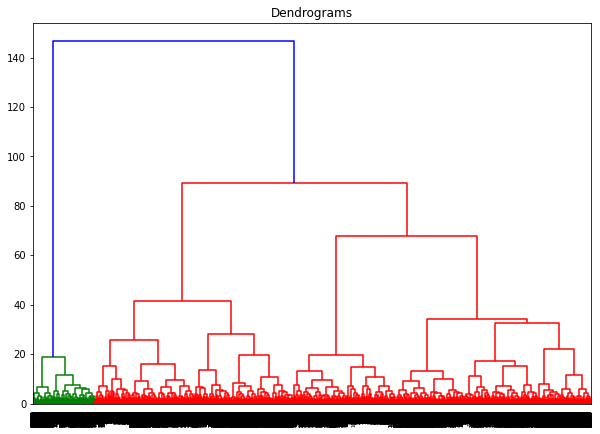

In [27]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_norm, method='ward'))

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 4 and cut the dendrogram:

if we draw a horizontal line that passes through longest distance without a horizontal line, we get 4 clusters as shown in the following figure:

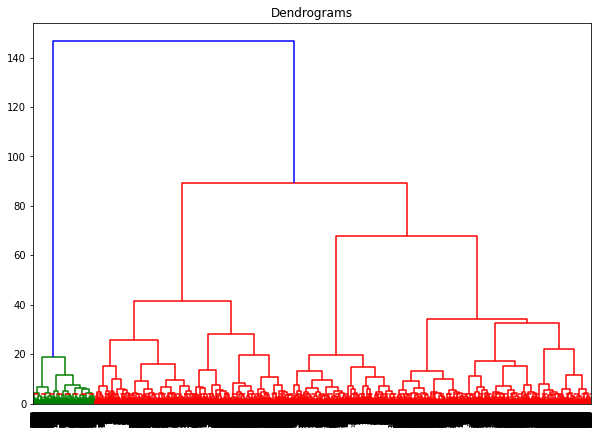

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_norm, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

Now we know the number of clusters for our dataset, the next step is to group the data points into these four clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
#cluster.fit_predict(df)
cluster.fit_predict(X_norm)

array([0, 0, 0, ..., 2, 2, 2])

we can see the cluster labels from all of your data points. Since we had four clusters, we have four labels in the output i.e. 0 to 3.

In [ ]:

print(cluster.labels_)

[0 0 0 ... 2 2 2]


Finally, let's plot our clusters.

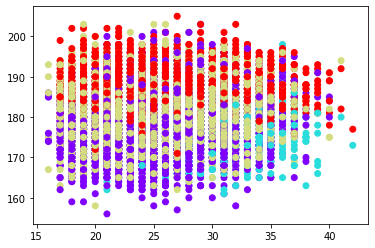

In [ ]:
X_norm = pd.DataFrame(x_scaled)
plt.scatter(x[:,0],x[:,1], c = cluster.labels_, cmap = 'rainbow')